In [9]:
from sklearn.datasets import fetch_california_housing

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [33]:
df=fetch_california_housing()

In [35]:
dataset=pd.DataFrame(df.data)

In [37]:
dataset.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [39]:
dataset.columns=df.feature_names

In [41]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [43]:
X=dataset
y=df.target

In [45]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=1)

In [55]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()


In [59]:
X_train=scaler.fit_transform(X_train)

In [61]:
X_test=scaler.transform(X_test)

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [77]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [73]:
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [75]:
np.mean(mse)

-0.5312491746537695

In [79]:
reg_pred=regression.predict(X_test)

In [81]:
reg_pred

array([2.12584649, 0.94311727, 2.70877986, ..., 2.32724505, 2.1605237 ,
       1.6761507 ])

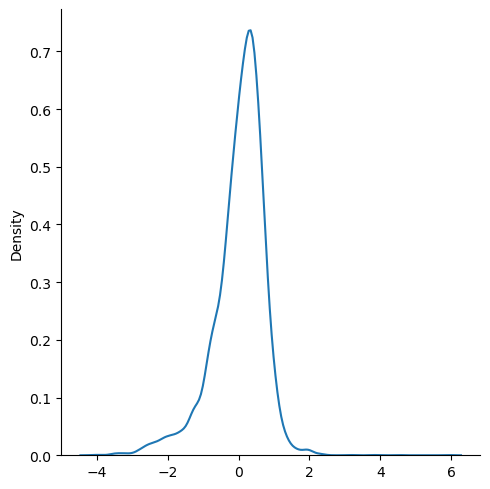

In [87]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')